In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gootraintest/Google_Stock_Price_Test.csv
/kaggle/input/gootraintest/Google_Stock_Price_Train.csv
/kaggle/input/gstock/Google_Stock_Price_Train (1).csv
/kaggle/input/googdata/goog.csv


In [2]:
df = pd.read_csv('/kaggle/input/gstock/Google_Stock_Price_Train (1).csv')
df.head(1)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500


In [3]:
train=df.iloc[:1250,1:2]
test=df.iloc[1250:,1:2]

In [12]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
train_transformed=sc.fit_transform(train)

In [13]:
train_transformed.shape

(1250, 1)

In [14]:
x_train=[]
y_train=[]
time  = 60
for i in range(time,train_transformed.shape[0]):
    x_train.append(train_transformed[i-60:i,0])
    y_train.append(train_transformed[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [15]:
x_train.shape

(1190, 60)

In [22]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [23]:
y_train.shape,x_train.shape

((1190,), (1190, 60, 1))

In [31]:
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN,Dropout

model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(rate=0.2))

model.add(SimpleRNN(units = 50, return_sequences=True))
model.add(Dropout(rate=0.2))

model.add(SimpleRNN(units=50))
model.add(Dropout(rate=0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mse',metrics=['mae','accuracy'])
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)        │ (None, 60, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ (None, 60, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,751 (49.81 KB)

 Trainable params: 12,751 (49.81 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
history=model.fit(x_train,y_train,epochs=50,batch_size=32,validation_split = 0.05)

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.0000e+00 - loss: 0.4311 - mae: 0.5260 - val_accuracy: 0.0167 - val_loss: 0.0070 - val_mae: 0.0801
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0000e+00 - loss: 0.2187 - mae: 0.3763 - val_accuracy: 0.0167 - val_loss: 0.0019 - val_mae: 0.0366
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.0000e+00 - loss: 0.1205 - mae: 0.2722 - val_accuracy: 0.0167 - val_loss: 0.0383 - val_mae: 0.1946
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.0000e+00 - loss: 0.0699 - mae: 0.2034 - val_accuracy: 0.0167 - val_loss: 0.0116 - val_mae: 0.1056
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.0000e+00 - loss: 0.0572 - mae: 0.1772 - val_accuracy: 0.0167 - val_loss: 0.0058 - val_mae: 0.0733
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.0000e+00 - loss: 0.0365 - mae: 0.1467 - val_accuracy: 0.0167 - val_loss: 0.0036 - val_mae: 0.0575
Epoch 7/50
36/36 ━━━━━

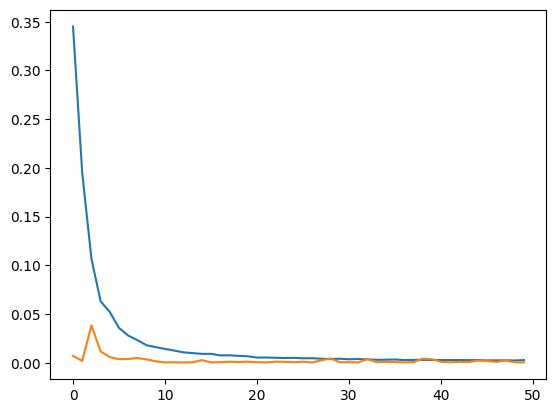

In [36]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']);

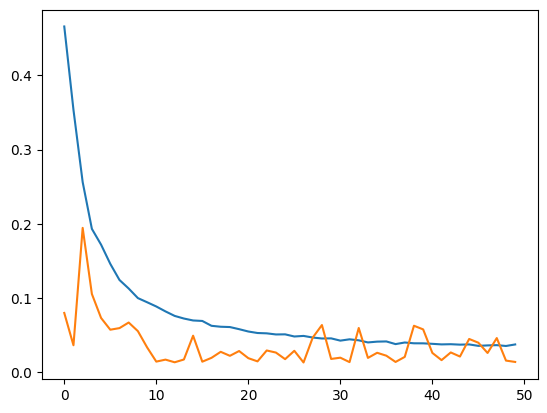

In [37]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])